In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import datetime
from datetime import date

# Load the Customer Personality Analysis dataset
# Replace 'your_dataset.csv' with the actual file path
df = pd.read_csv('marketing_campaign.csv',sep='\t')

# Data exploration
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [142]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [143]:
# Income column has missing values need to drop those
df = df.dropna()
df.isna().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [144]:
# Coverting date to no of days customer has been enrolled with company and drpping the date column
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

# Find the earliest enrollment date
earliest_date = min(df["Dt_Customer"])

# Calculate the number of days a customer has been enrolled
df["Customer_For"] = (df["Dt_Customer"] - earliest_date).dt.days



# Dates of the newest and oldest recorded customer
print("The newest customer's joined on:", max(dates))
print("The oldest customer's joined on:", min(dates))
# Print the resulting DataFrame

df.drop("Dt_Customer",axis=1,inplace=True)
df.head()

The newest customer's joined on: 2014-06-29
The oldest customer's joined on: 2012-07-30


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,0,0,0,0,3,11,1,36
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,0,3,11,0,586
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,0,0,0,0,3,11,0,387
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,0,0,0,0,3,11,0,560
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,0,3,11,0,538


In [145]:
#When checked in df.info we saw 3 features haiving non numeric values for Date,Maritial Status and Education so we check for unique values for them
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [146]:
#As seen Marritial status has lots of terms that mean same so we replace them to mean what they actually are
df['Marital_Status']=df['Marital_Status'].replace({'Divorced':1,'Single':1,'Married':2,'Together':2,'Absurd':1,'Widow':1,'YOLO':2,'Alone':1})

#We change terms to what is familiar to me as per Indian Education System, but give it numbers since its needed to be numeric for kmeans
df['Education']=df['Education'].replace({'Basic':1,'2n Cycle':2,'Graduation':2,'Master':3,'PhD':4})
print(df['Marital_Status'].value_counts())
print(df['Education'].value_counts())

2    1432
1     784
Name: Marital_Status, dtype: int64
2    1316
4     481
3     365
1      54
Name: Education, dtype: int64


In [147]:
#Create a feature of total spending combining all other types of spending together
df['TotalSpendings'] =  df.MntWines + df.MntFruits + df.MntMeatProducts + df.MntFishProducts + df.MntSweetProducts + df.MntGoldProds
df['TotalSpendings']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: TotalSpendings, Length: 2216, dtype: int64

In [148]:
#Derive Age from Birth Year and drop Birth Year use 2014 as latest date was 2014 and since the data is from 2014 this dataset should have age of people 
#in 2014 as well
df['Age'] = 2014 - df.Year_Birth
df.drop("Year_Birth",axis=1,inplace=True)


In [149]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,TotalSpendings,Age
0,5524,2,1,58138.0,0,0,58,635,88,546,...,0,0,0,0,3,11,1,36,1617,57
1,2174,2,1,46344.0,1,1,38,11,1,6,...,0,0,0,0,3,11,0,586,27,60
2,4141,2,2,71613.0,0,0,26,426,49,127,...,0,0,0,0,3,11,0,387,776,49
3,6182,2,2,26646.0,1,0,26,11,4,20,...,0,0,0,0,3,11,0,560,53,30
4,5324,4,2,58293.0,1,0,94,173,43,118,...,0,0,0,0,3,11,0,538,422,33


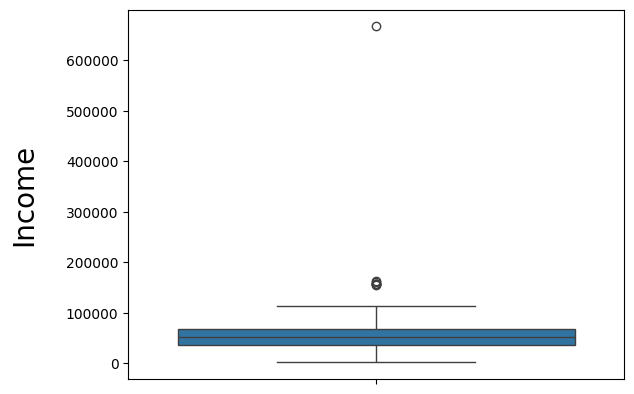

In [150]:
#Find and removing outliers for income
plt.figure()
sns.boxplot(y=df.Income);
plt.ylabel('Income', fontsize=20, labelpad=20)

df = df[df.Income < 200000]


Text(0, 0.5, 'Income')

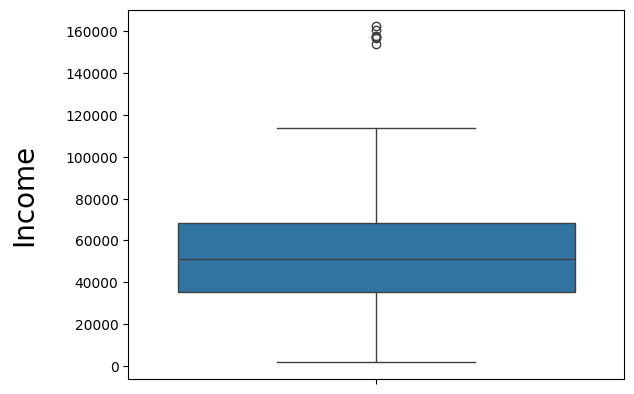

In [151]:
plt.figure()
sns.boxplot(y=df.Income);
plt.ylabel('Income', fontsize=20, labelpad=20)

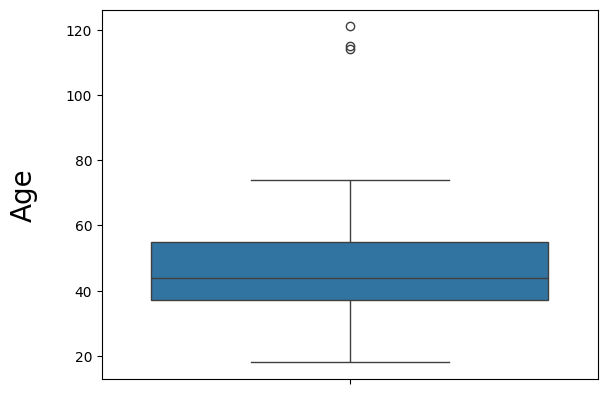

In [152]:
#Find and removing outliers for age
plt.figure()
sns.boxplot(y=df.Age);
plt.ylabel('Age', fontsize=20, labelpad=20)

df = df[df.Age < 100]


Text(0, 0.5, 'Age')

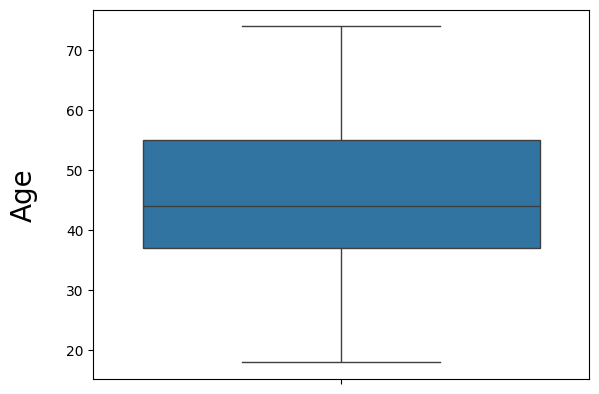

In [153]:
#Find and removing outliers for age
plt.figure()
sns.boxplot(y=df.Age);
plt.ylabel('Age', fontsize=20, labelpad=20)

Text(0, 0.5, 'Age')

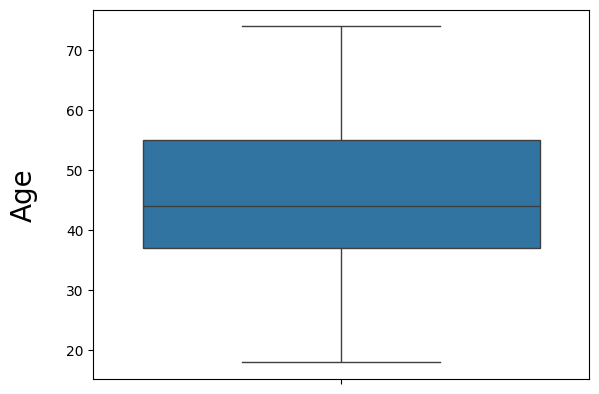

In [154]:
#Find and removing outliers for age
plt.figure()
sns.boxplot(y=df.Age);
plt.ylabel('Age', fontsize=20, labelpad=20)

In [157]:
df.drop("ID",axis = 1,inplace=True)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,TotalSpendings,Age
0,2,1,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,3,11,1,36,1617,57
1,2,1,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,3,11,0,586,27,60
2,2,2,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,3,11,0,387,776,49
3,2,2,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,3,11,0,560,53,30
4,4,2,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,3,11,0,538,422,33


C:\Users\rauna\anaconda3\envs\maybe_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rauna\anaconda3\envs\maybe_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rauna\anaconda3\envs\maybe_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rauna\anaconda3\envs\maybe_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

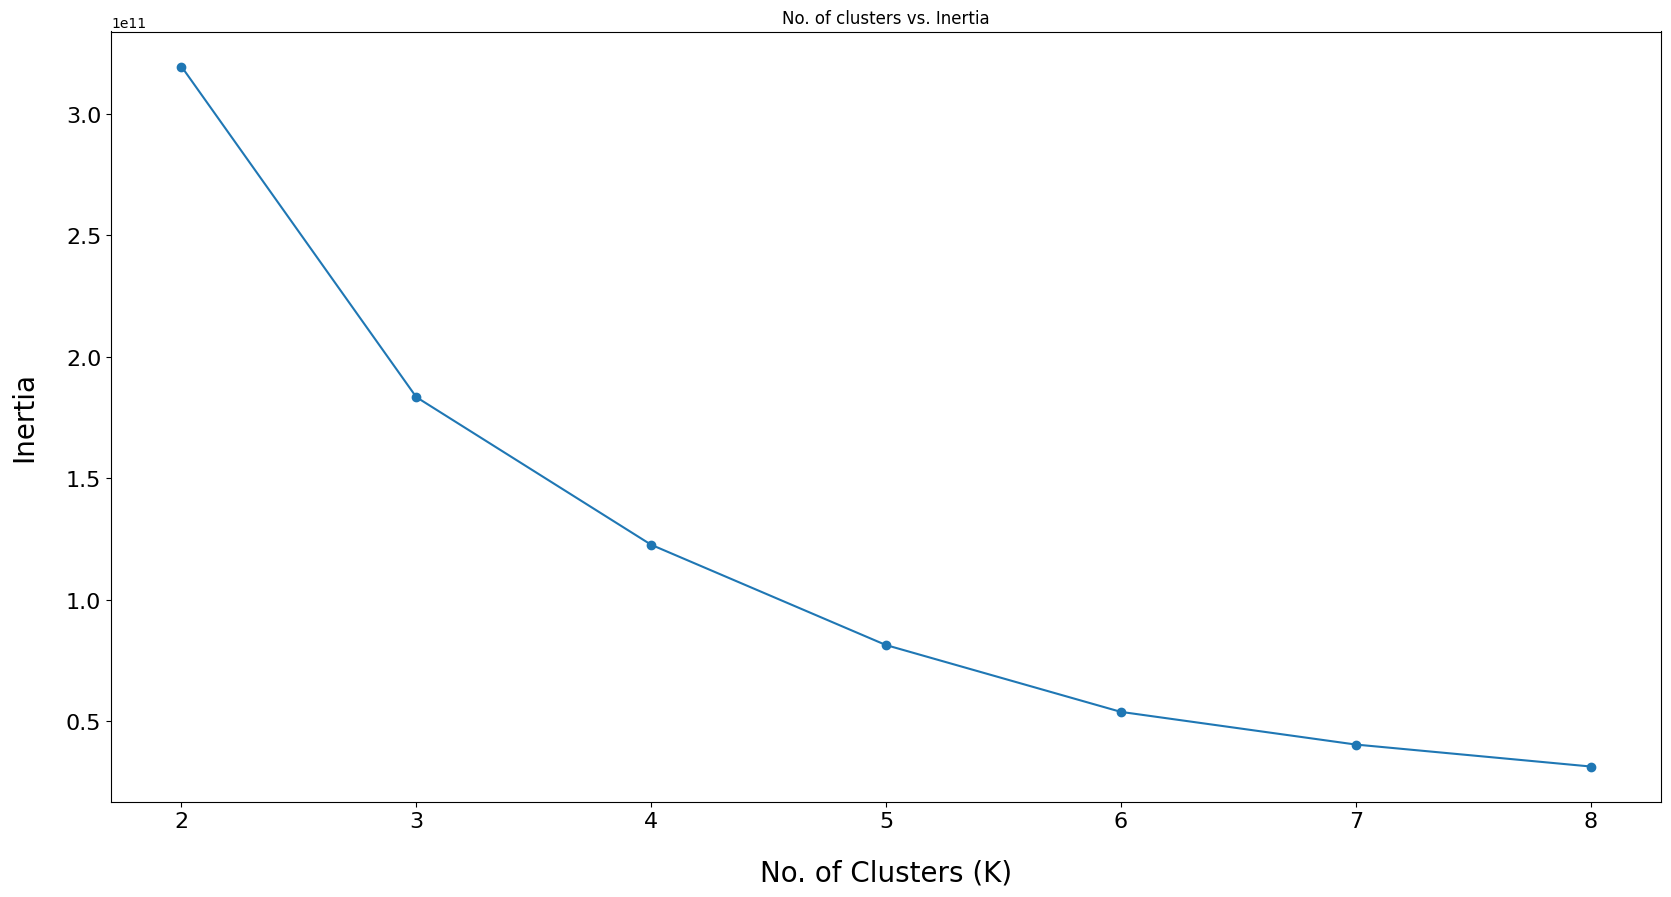

In [158]:
#We check for inertia of model with and without scaling of data and find that 4 is a good Cluster number to go with

from sklearn.cluster import KMeans

options = range(2,9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(df)
    inertias.append(model.inertia_)

plt.figure(figsize=(20,10))    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Clusters (K)', fontsize=20, labelpad=20)
plt.ylabel('Inertia', fontsize=20, labelpad=20);

In [182]:
# Standardize and scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

C:\Users\rauna\anaconda3\envs\maybe_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rauna\anaconda3\envs\maybe_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rauna\anaconda3\envs\maybe_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rauna\anaconda3\envs\maybe_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

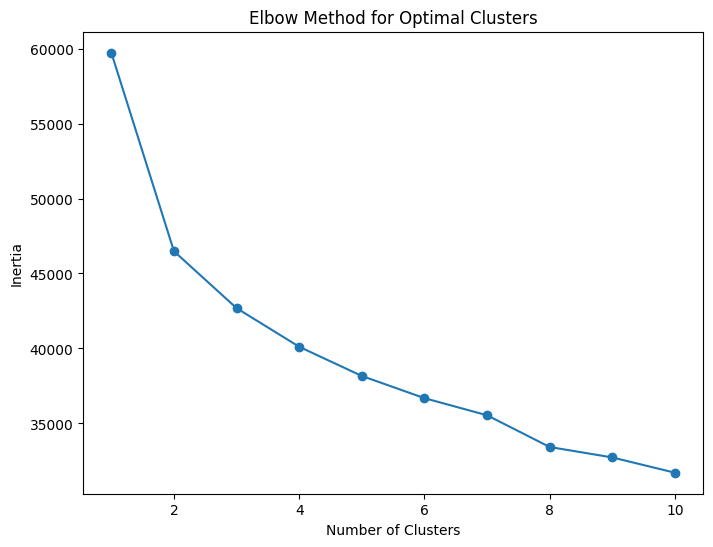

In [160]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

C:\Users\rauna\anaconda3\envs\maybe_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


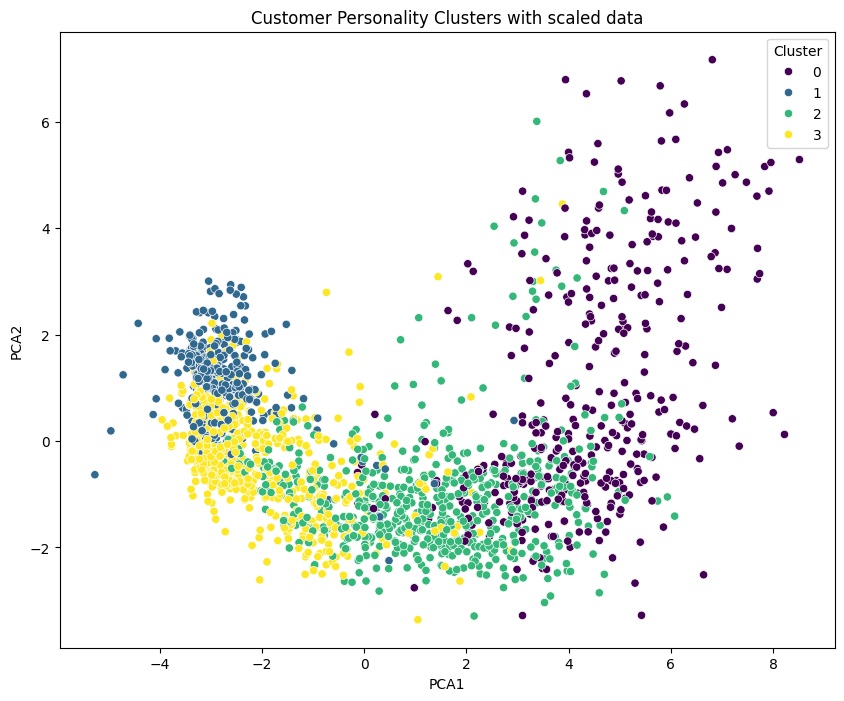

Customer personality analysis completed!


In [189]:
# Choose the optimal number of clusters=4 and scaled data for PCA and try to visualize the clusters, however this does not show any easily understandable visuals
n_clusters = 4

# Apply k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)
df['Cluster_Scaled'] = kmeans.labels_

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

# Visualize clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Personality Clusters with scaled data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Profile the clusters
cluster_profiles = df.groupby('Cluster_Scaled').mean()

print("Customer personality analysis completed!")


C:\Users\rauna\anaconda3\envs\maybe_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


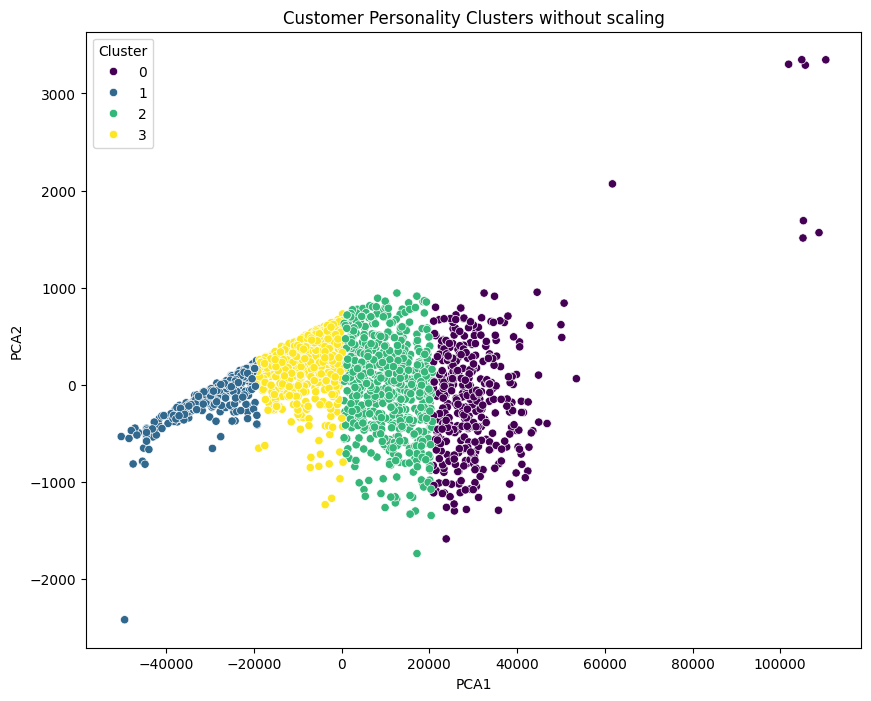

Customer personality analysis completed!


In [190]:
# Choose the optimal number of clusters=4 without scaling of data
n_clusters = 4

# Apply k-means clustering
model = KMeans(n_clusters=n_clusters, random_state=42)
model.fit(df)
df['Cluster'] = model.labels_

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

# Visualize clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Personality Clusters without scaling')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Profile the clusters (e.g., mean values of features)
cluster_profiles = df.groupby('Cluster').mean()

print("Customer personality analysis completed!")


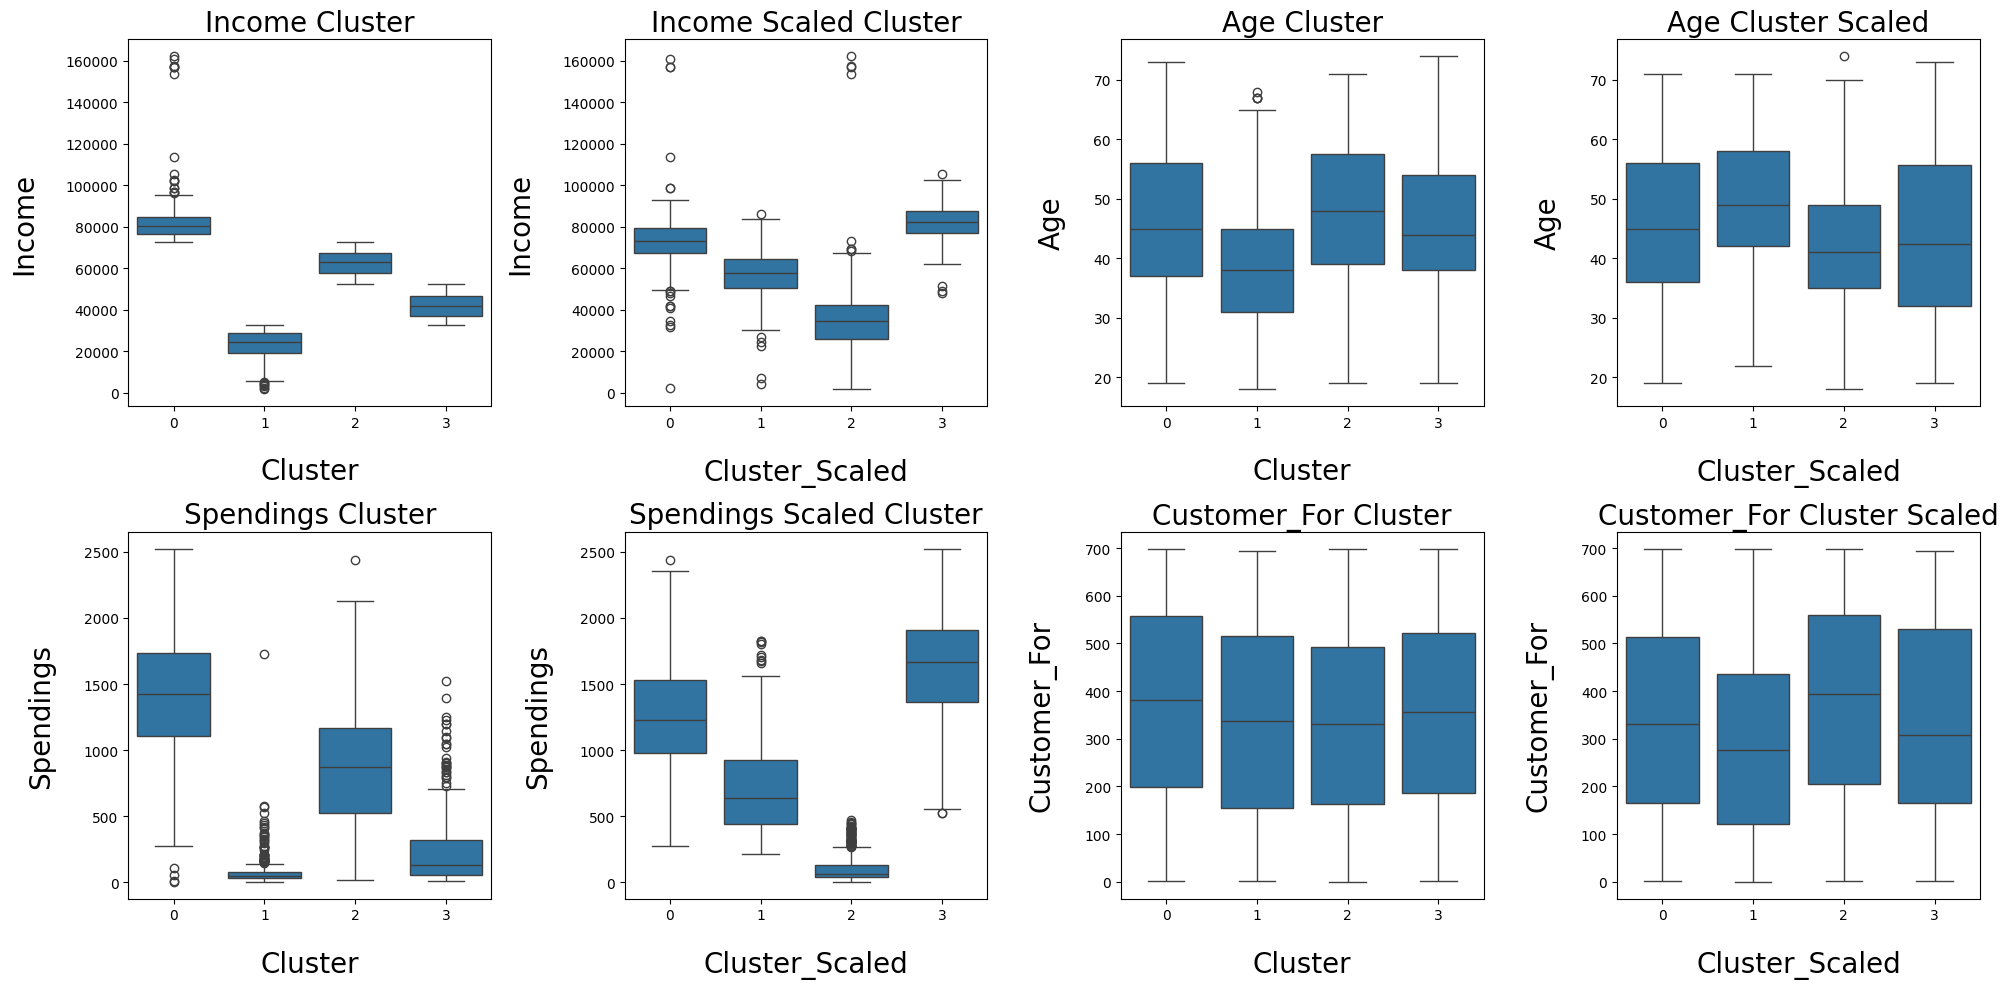

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots (2 rows, 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Plot boxplot for 'Cluster' (Income)
sns.boxplot(data=df, x='Cluster', y='Income', ax=axes[0, 0])
axes[0, 0].set_xlabel('Cluster', fontsize=20, labelpad=20)
axes[0, 0].set_ylabel('Income', fontsize=20, labelpad=20)
axes[0, 0].set_title('Income Cluster', fontsize=20)

# Plot boxplot for 'Cluster_Scaled' (Income)
sns.boxplot(data=df, x='Cluster_Scaled', y='Income', ax=axes[0, 1])
axes[0, 1].set_xlabel('Cluster_Scaled', fontsize=20, labelpad=20)
axes[0, 1].set_ylabel('Income', fontsize=20, labelpad=20)
axes[0, 1].set_title('Income Scaled Cluster', fontsize=20)

# Plot boxplot for 'Cluster' (TotalSpendings)
sns.boxplot(data=df, x='Cluster', y='TotalSpendings', ax=axes[1, 0])
axes[1, 0].set_xlabel('Cluster', fontsize=20, labelpad=20)
axes[1, 0].set_ylabel('Spendings', fontsize=20, labelpad=20)
axes[1, 0].set_title('Spendings Cluster', fontsize=20)

# Plot boxplot for 'Cluster_Scaled' (TotalSpendings)
sns.boxplot(data=df, x='Cluster_Scaled', y='TotalSpendings', ax=axes[1, 1])
axes[1, 1].set_xlabel('Cluster_Scaled', fontsize=20, labelpad=20)
axes[1, 1].set_ylabel('Spendings', fontsize=20, labelpad=20)
axes[1, 1].set_title('Spendings Scaled Cluster', fontsize=20)

# Plot boxplot for 'Cluster' (Age)
sns.boxplot(data=df, x='Cluster', y='Age', ax=axes[0, 2])
axes[0, 2].set_xlabel('Cluster', fontsize=20, labelpad=20)
axes[0, 2].set_ylabel('Age', fontsize=20, labelpad=20)
axes[0, 2].set_title('Age Cluster', fontsize=20)

# Plot boxplot for 'Cluster_Scaled' (Age)
sns.boxplot(data=df, x='Cluster_Scaled', y='Age', ax=axes[0, 3])
axes[0, 3].set_xlabel('Cluster_Scaled', fontsize=20, labelpad=20)
axes[0, 3].set_ylabel('Age', fontsize=20, labelpad=20)
axes[0, 3].set_title('Age Cluster Scaled', fontsize=20)

# Plot boxplot for 'Cluster' (Customer_For)
sns.boxplot(data=df, x='Cluster', y='Customer_For', ax=axes[1, 2])
axes[1, 2].set_xlabel('Cluster', fontsize=20, labelpad=20)
axes[1, 2].set_ylabel('Customer_For', fontsize=20, labelpad=20)
axes[1, 2].set_title('Customer_For Cluster', fontsize=20)

# Plot boxplot for 'Cluster_Scaled' (Customer_For)
sns.boxplot(data=df, x='Cluster_Scaled', y='Customer_For', ax=axes[1, 3])
axes[1, 3].set_xlabel('Cluster_Scaled', fontsize=20, labelpad=20)
axes[1, 3].set_ylabel('Customer_For', fontsize=20, labelpad=20)
axes[1, 3].set_title('Customer_For Cluster Scaled', fontsize=20)

plt.tight_layout()
plt.show()


In [185]:
    #Looking at all the plots its easy to understand that the clustering has been done using income and spending habits, and as is intuitive, class that spends more also has high income and vice versa
